Importing the Dependencies

In [777]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [778]:
P_Info = pd.read_csv('/content/P.csv')

In [779]:
print(P_Info.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [780]:
print(P_Info.tail())

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA 

In [781]:
print("The P_Info has {} rows and {} columns".format(P_Info.shape[0], P_Info.shape[1]))

The P_Info has 195 rows and 24 columns


In [782]:
print(P_Info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [783]:
print(P_Info.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [784]:
print(P_Info.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [785]:
import matplotlib.pyplot as plt

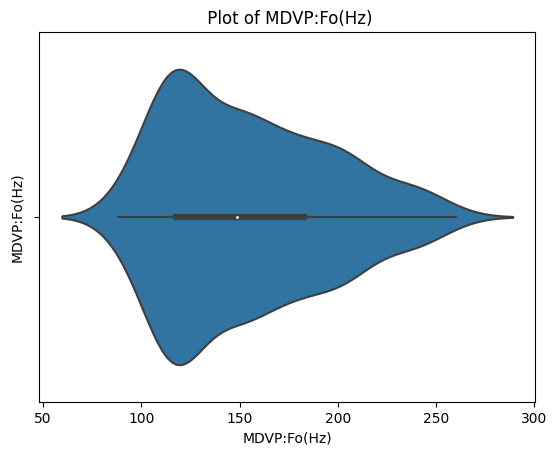

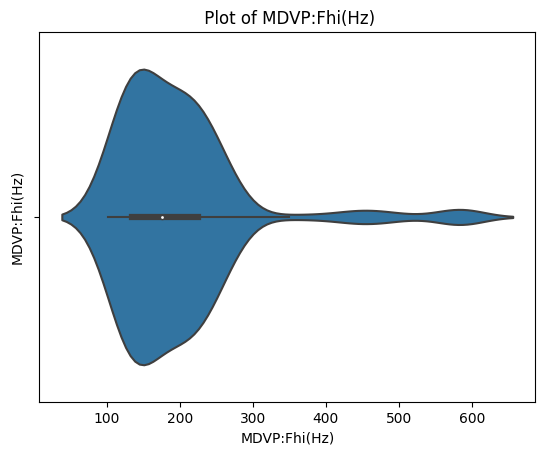

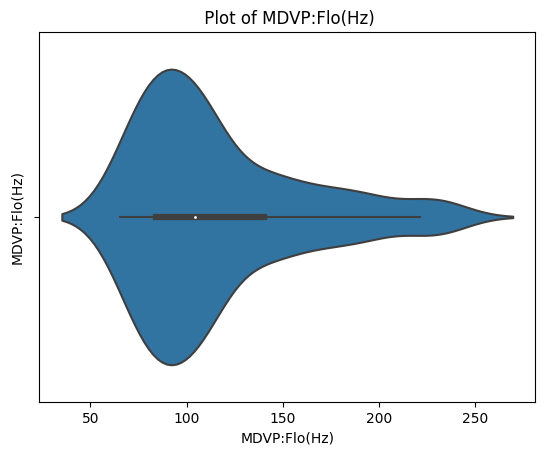

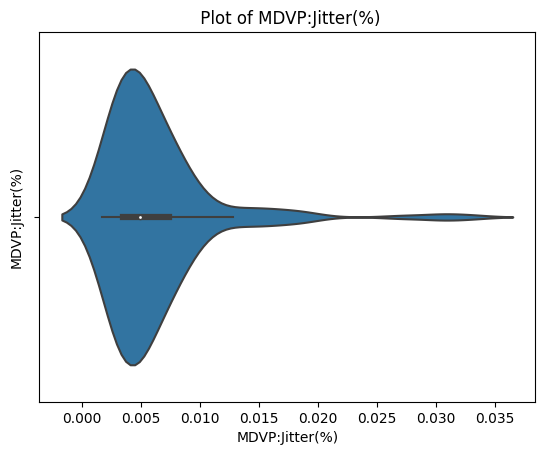

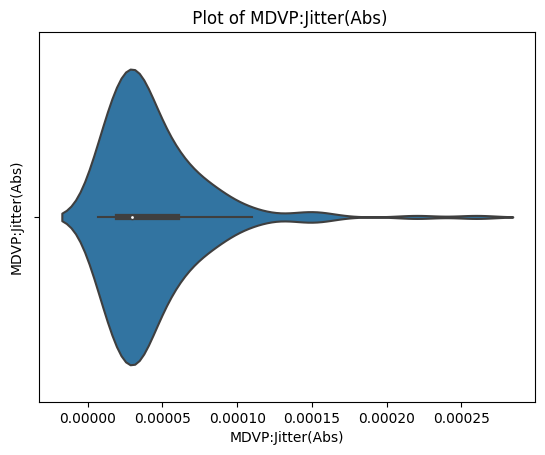

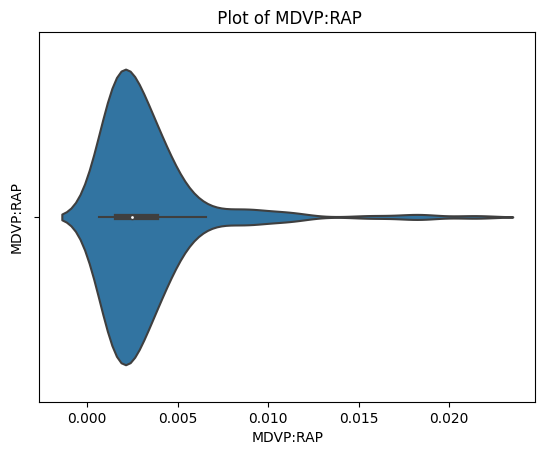

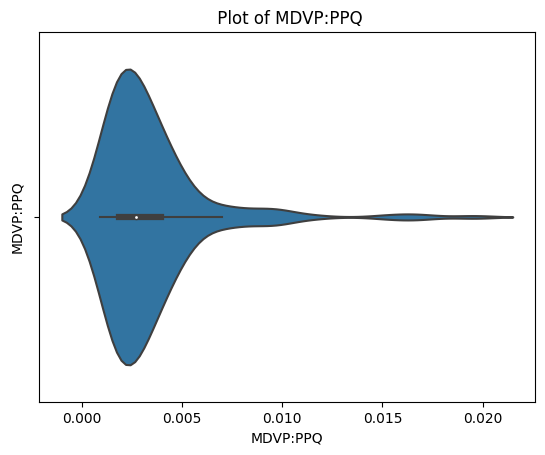

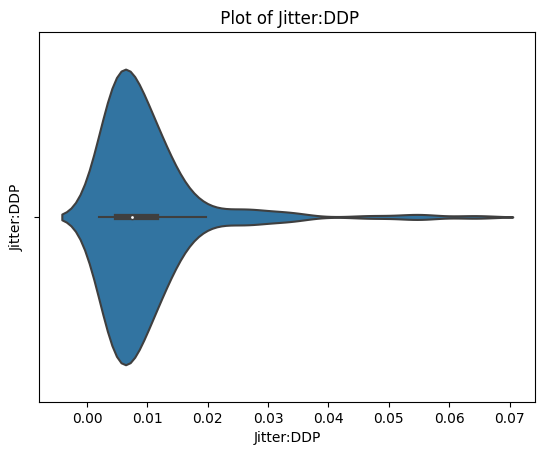

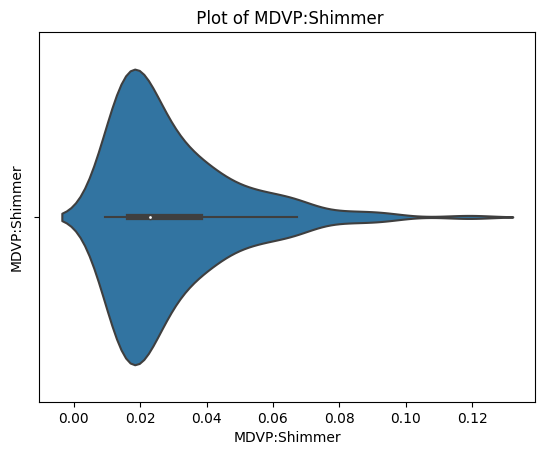

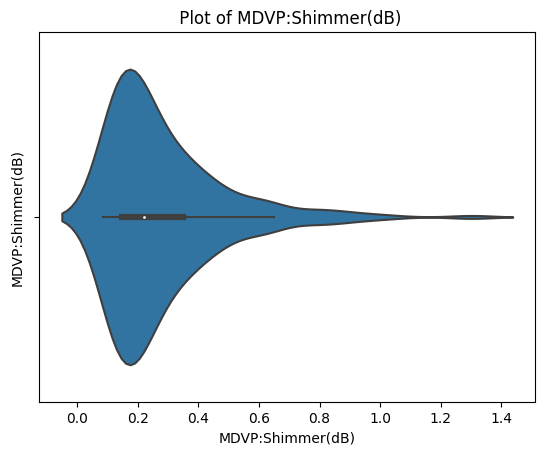

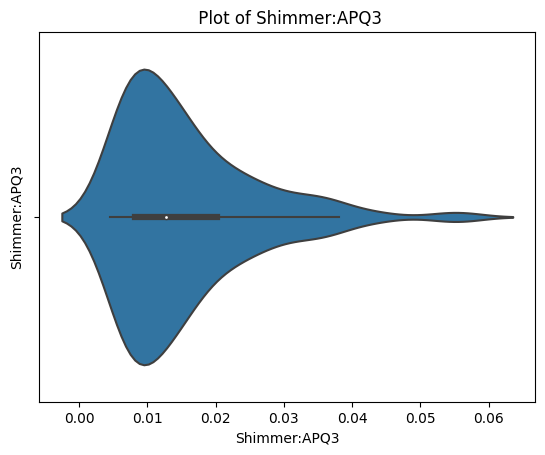

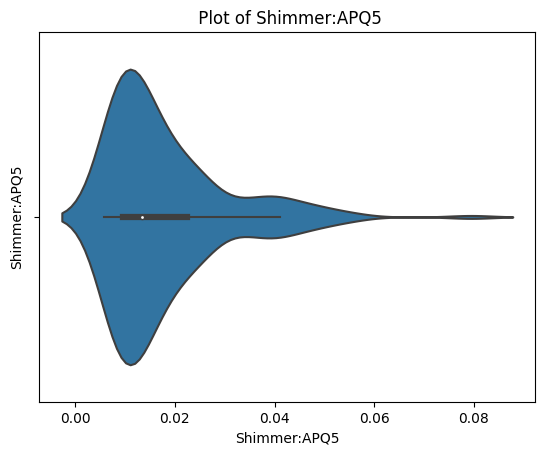

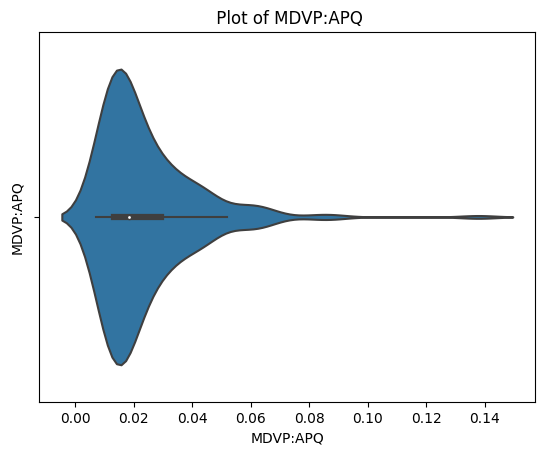

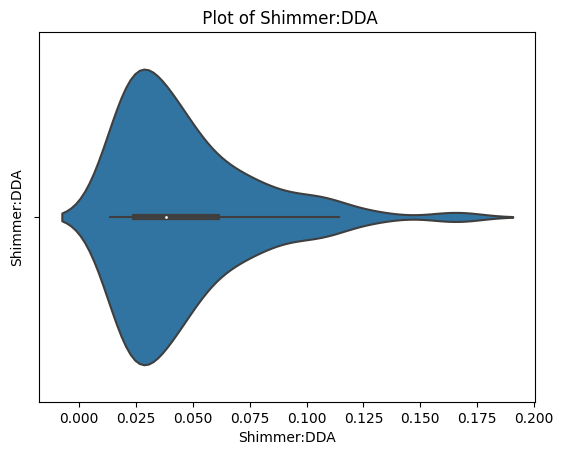

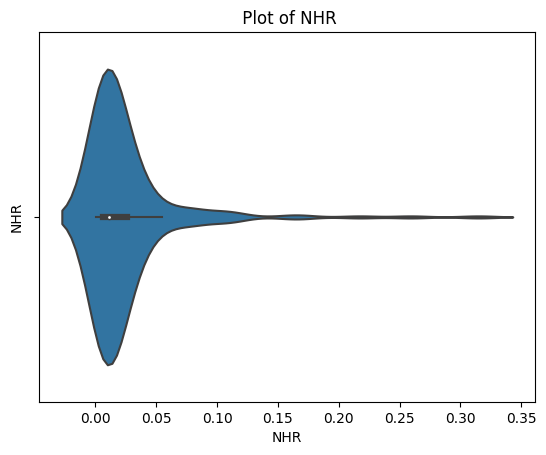

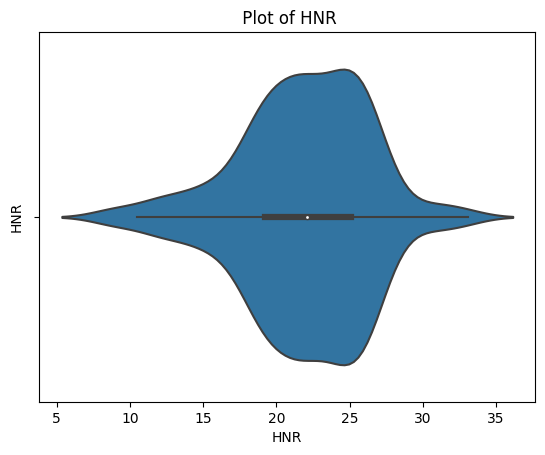

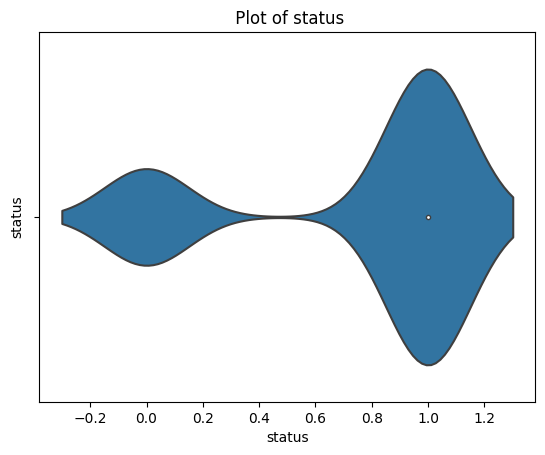

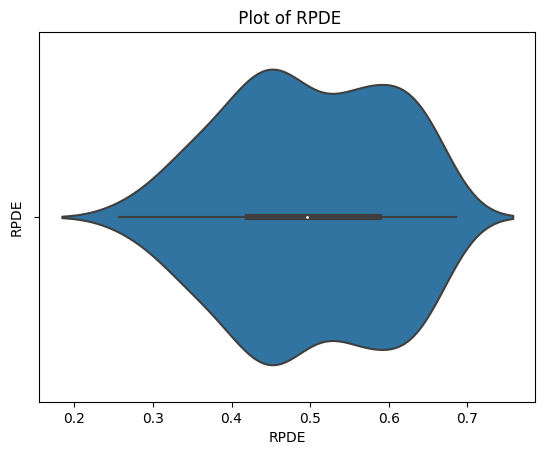

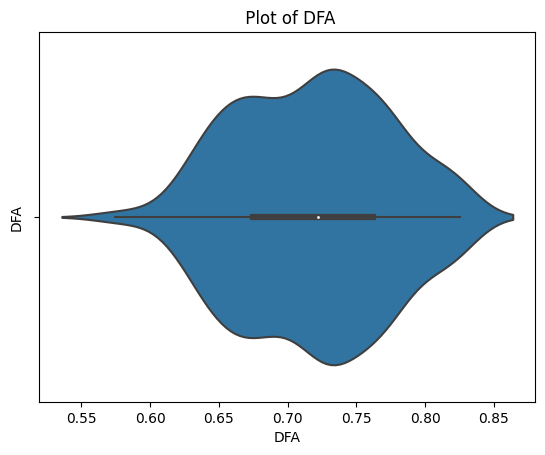

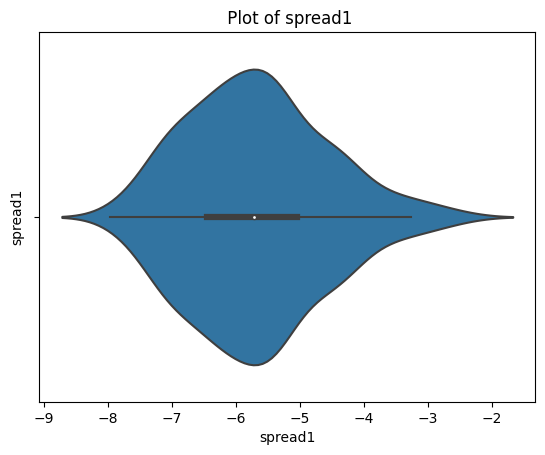

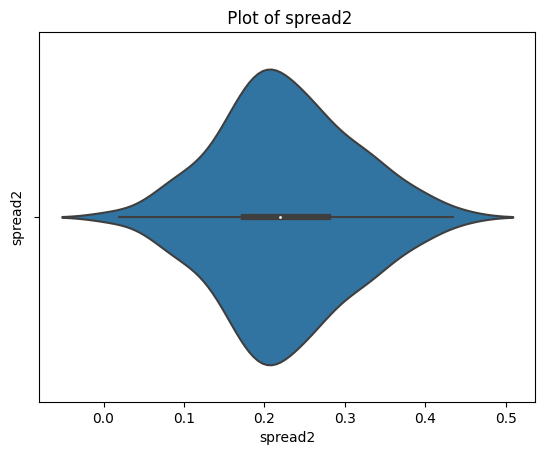

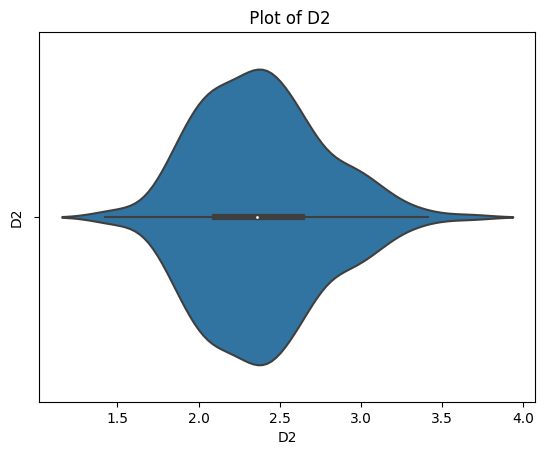

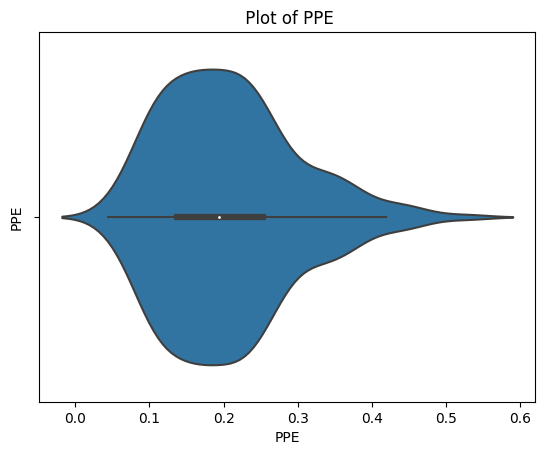

In [786]:
import seaborn as sns

for i in P_Info.columns[1:]:
    fig, ax = plt.subplots()
    sns.violinplot(x=P_Info[i], ax=ax)
    ax.set_ylabel(i)
    ax.set_title(f" Plot of {i}")
    plt.show()

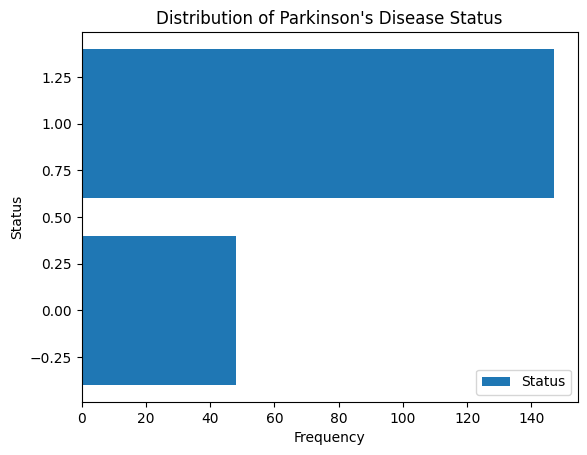

In [787]:
status_counts = P_Info['status'].value_counts()
fig, ax = plt.subplots()
ax.barh(status_counts.index, status_counts.values, label='Status')
ax.set_xlabel("Frequency")
ax.set_ylabel("Status")
ax.set_title("Distribution of Parkinson's Disease Status")
ax.legend()
plt.show()

In [788]:
status_counts = P_Info.groupby('status').size()
print(status_counts)

status
0     48
1    147
dtype: int64


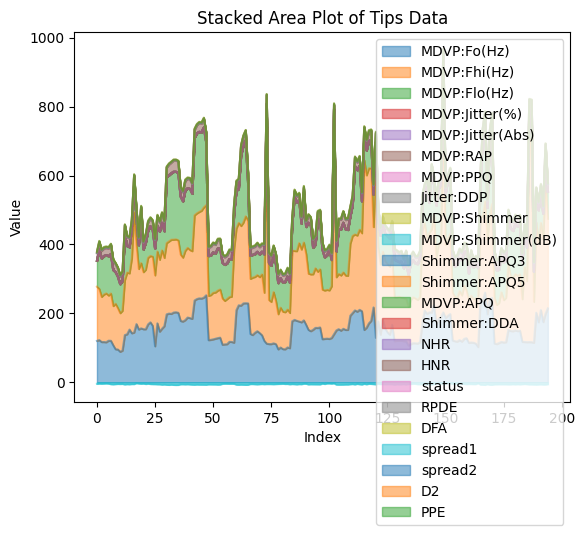

In [789]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
P_Info = pd.read_csv('/content/P.csv')

# create a stacked area plot
fig, ax = plt.subplots()
P_Info.select_dtypes(include='number').plot.area(ax=ax, alpha=0.5)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_title("Stacked Area Plot of Tips Data")
plt.show()

In [790]:
print(f"The Parkinsons Info: {P_Info.shape}")
x = P_Info.iloc[:, :-2]
print(f"Features shape: {x.shape}")
y = P_Info.iloc[:, -2]
print(f"Target shape: {y.shape}")

The Parkinsons Info: (195, 24)
Features shape: (195, 22)
Target shape: (195,)


In [791]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_numeric = x.select_dtypes(include=['float64', 'int64'])
X_scaled = scaler.fit_transform(x_numeric)

In [792]:
print(X_scaled)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.92029673  0.13975042
   0.17153026]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.95404891  0.40655399
   0.48267409]
 [-0.66992292 -0.88174367 -0.46942324 ...  1.          0.2734894
   0.37274182]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.35140196 -0.57411065
  -0.31484696]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.44484196 -0.5586992
  -0.09423055]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.28228807 -0.18967744
  -0.16981039]]


In [793]:
unique = np.unique(P_Info['status'])
for status in unique:
    print(f"Mean for status {status}: {np.mean(P_Info[P_Info['status'] == status])}")

Mean for status 0: MDVP:Fo(Hz)         181.937771
MDVP:Fhi(Hz)        223.636750
MDVP:Flo(Hz)        145.207292
MDVP:Jitter(%)        0.003866
MDVP:Jitter(Abs)      0.000023
MDVP:RAP              0.001925
MDVP:PPQ              0.002056
Jitter:DDP            0.005776
MDVP:Shimmer          0.017615
MDVP:Shimmer(dB)      0.162958
Shimmer:APQ3          0.009504
Shimmer:APQ5          0.010509
MDVP:APQ              0.013305
Shimmer:DDA           0.028511
NHR                   0.011483
HNR                  24.678750
status                0.000000
RPDE                  0.442552
DFA                   0.695716
spread1              -6.759264
spread2               0.160292
D2                    2.154491
PPE                   0.123017
dtype: float64
Mean for status 1: MDVP:Fo(Hz)         145.180762
MDVP:Fhi(Hz)        188.441463
MDVP:Flo(Hz)        106.893558
MDVP:Jitter(%)        0.006989
MDVP:Jitter(Abs)      0.000051
MDVP:RAP              0.003757
MDVP:PPQ              0.003900
Jitter:DDP       

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [794]:
X = P_Info.drop(columns=['name','status'], axis=1)
Y = P_Info['status']

In [795]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [796]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [797]:
X_Learning, X_Analysis, Y_Learning, Y_Analysis = train_test_split(X, Y, test_size=0.2)

In [798]:
print(X.shape, X_Learning.shape, X_Analysis.shape)

(195, 22) (156, 22) (39, 22)


In [799]:
clf = LogisticRegression()
clf.fit(X_Learning, Y_Learning)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [800]:
pred_logistic_test = clf.predict(X_Analysis)
pred_logistic_train = clf.predict(X_Learning)

In [801]:
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(Y_Analysis, pred_logistic_test))

Training Accuracy:  0.8910256410256411
Test Accuracy:  0.7435897435897436


In [802]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_Analysis)
cm = confusion_matrix(Y_Analysis, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(Y_Analysis, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[ 5  5]
 [ 5 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.83      0.83      0.83        29

    accuracy                           0.74        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.74      0.74      0.74        39



In [803]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_Learning, Y_Learning)

DecisionTreeClassifier()

In [804]:
#decision tree classifier
pred_dt_test = dt.predict(X_Learning)
pred_dt_train = dt.predict(X_Learning)

In [805]:
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_dt_train))
print("Test Accuracy: ", accuracy_score(Y_Learning, pred_dt_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [806]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Learning, pred_dt_test))

print("\nClassification Report:")
print(classification_report(Y_Learning, pred_dt_test))

Confusion Matrix: 
[[ 38   0]
 [  0 118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       118

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [807]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# define the number of folds for cross-validation
num_folds = 10

# define the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True)

# define the parameter grid for the decision tree model
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# create a decision tree model
P = DecisionTreeClassifier()

# create a GridSearchCV object
dt_grid_search = GridSearchCV(estimator=P, param_grid=dt_param_grid, cv=kfold, scoring='accuracy')

# fit the GridSearchCV object to the data
dt_grid_search.fit(X_Learning, Y_Learning)

# print the best parameters and score
print("Best parameters: ", dt_grid_search.best_params_)
print("Best score: ", dt_grid_search.best_score_)

# use the best parameters to fit a new decision tree model
best_P = DecisionTreeClassifier(**dt_grid_search.best_params_)
best_P.fit(X_Learning, Y_Learning)

# make predictions on the training and test sets using the new model
pred_dt_train = best_P.predict(X_Learning)
pred_dt_test = best_P.predict(X_Analysis)

# print the accuracy scores for the new model
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_dt_train))
print("Test Accuracy: ", accuracy_score(Y_Analysis, pred_dt_test))

Best parameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score:  0.8975
Training Accuracy:  0.9615384615384616
Test Accuracy:  0.8461538461538461


In [808]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_Learning, Y_Learning)

RandomForestClassifier()

In [809]:
train_pred_rf = rf.predict(X_Learning)
pred_rf = rf.predict(X_Analysis)

In [810]:
print("Training Accuracy: ",accuracy_score(Y_Learning, train_pred_rf))
print("Test Accuracy: ",accuracy_score(Y_Analysis, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.8461538461538461


In [811]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Analysis, pred_rf))

print("\nClassification Report:")
print(classification_report(Y_Analysis, pred_rf))

Confusion Matrix: 
[[ 5  5]
 [ 1 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.85      0.97      0.90        29

    accuracy                           0.85        39
   macro avg       0.84      0.73      0.76        39
weighted avg       0.84      0.85      0.83        39



In [812]:
import xgboost as xgb

# create an instance of XGBClassifier with default parameters
xg = xgb.XGBClassifier()

# fit the model to the training data
xg.fit(X_Learning, Y_Learning)

# predict target variable for test and train data using XGBoost classifier
xg_pred_train = xg.predict(X_Learning)
xg_pred = xg.predict(X_Analysis)

In [813]:
xg_pred_train = xg.predict(X_Learning)
xg_pred = xg.predict(X_Analysis)

In [814]:
print("Training Accuracy: ",accuracy_score(Y_Learning, xg_pred_train))
print("Test Accuracy: ",accuracy_score(Y_Analysis, xg_pred))

Training Accuracy:  1.0
Test Accuracy:  0.8461538461538461


In [815]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Analysis, xg_pred))

print("\nClassification Report:")
print(classification_report(Y_Analysis, xg_pred))

Confusion Matrix: 
[[ 6  4]
 [ 2 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



In [816]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import accuracy_score

# define the accuracy scores
scores = [
    ["Decision Tree", accuracy_score(Y_Learning, pred_dt_train), accuracy_score(Y_Analysis, pred_dt_test)],
    ["Random Forest", accuracy_score(Y_Learning, train_pred_rf), accuracy_score(Y_Analysis, pred_rf)],
    ["XGBoost", accuracy_score(Y_Learning, xg_pred_train), accuracy_score(Y_Analysis, xg_pred)],
    ["Logistic Regression", accuracy_score(Y_Learning, pred_logistic_train), accuracy_score(Y_Analysis, pred_logistic_test)]
]

# print the accuracy scores in a table format
headers = ["Model", "Training Accuracy", "Test Accuracy"]
print(tabulate(scores, headers=headers, tablefmt="grid", numalign="center", stralign="center"))

+---------------------+---------------------+-----------------+
|        Model        |  Training Accuracy  |  Test Accuracy  |
+=====================+=====================+=================+
|    Decision Tree    |      0.961538       |    0.846154     |
+---------------------+---------------------+-----------------+
|    Random Forest    |          1          |    0.846154     |
+---------------------+---------------------+-----------------+
|       XGBoost       |          1          |    0.846154     |
+---------------------+---------------------+-----------------+
| Logistic Regression |      0.891026       |     0.74359     |
+---------------------+---------------------+-----------------+


In [817]:
import pickle
from sklearn.tree import DecisionTreeClassifier

# train a decision tree model
P = DecisionTreeClassifier()
P.fit(X_Learning, Y_Learning)

# save the model to a file using pickle
filename = 'Parkinsons.sav'
pickle.dump(P, open(filename, 'wb'))

# load the model from the file using pickle
loaded_model = pickle.load(open(filename, 'rb'))

# use the loaded model to make predictions
preds = loaded_model.predict(X_Analysis)

# print the feature names used in the decision tree
for feature_name in X.columns:
    print(feature_name)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
